In [1]:
from pandas import*
import pandas as pd
from scipy.special import gamma, factorial
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import math as math
import cqfpyscript as pys #cqfpyscript contains the functions used in the project

In [2]:
#Python Code:Bootstrapping implied survival probabilities from CDS input data
#INPUT DATA: Risk-free rate,r for discount factor and a vector of CDS at different maturities.
#This function is limited to a vector of CDS up to exactly 5yrs maturities

In [3]:
#CDS input data. First index in array is intentionally set to Zero(0).
CDS_percent_change=0.0
CDS_arr = (np.array([0,43,50.5,58,71,84]))/10000 # CDS CS 
# Risk-free rate,r @ 2%
# call the implied survival probabilities function(ISP)
pys.ISP(0.02,CDS_arr) #call the cqfpyscript script
ISP_array1= DataFrame(pys.ISP(0.02,CDS_arr),columns= list('123456'))

In [4]:
CDS_arr = (np.array([0,96,109.5,123,137,151]))/10000 # CDS DB 
# Risk-free rate,r @ 2%
# call the implied survival probabilities function(ISP)
pys.ISP(0.02,CDS_arr)
ISP_array2= DataFrame(pys.ISP(0.02,CDS_arr),columns= list('123456'))

In [5]:
CDS_arr = (np.array([0,34,33.5,33,40.5,48]))/10000 # CDS JPM
# Risk-free rate,r @ 2%
# call the implied survival probabilities function(ISP)
pys.ISP(0.02,CDS_arr)
ISP_array3= DataFrame(pys.ISP(0.02,CDS_arr),columns= list('123456'))

In [6]:
CDS_arr = (np.array([0,53,64.5,76,92.5,109]))/10000 # CDS BCS
# Risk-free rate,r @ 2%
# call the implied survival probabilities function(ISP)
pys.ISP(0.02,CDS_arr)
ISP_array4= DataFrame(pys.ISP(0.02,CDS_arr),columns= list('123456'))

In [7]:
CDS_arr = (np.array([0,34,36,38,46,54]))*(1+CDS_percent_change)/10000 # CDS WFC
#CDS_arr = (np.array([0,34,36,38,46,54]))/10000 # CDS WFC # Use this line if CDS_percent change is not being considered.
# Risk-free rate,r @ 2%
# call the implied survival probabilities function(ISP)
pys.ISP(0.02,CDS_arr)
ISP_array5= DataFrame(pys.ISP(0.02,CDS_arr),columns= list('123456'))

In [8]:
ISP_array=pd.DataFrame()
ISP_array=ISP_array.append(ISP_array1)

In [9]:
ISP_array=ISP_array.append(ISP_array2)

In [10]:
ISP_array=ISP_array.append(ISP_array3)

In [11]:
ISP_array=ISP_array.append(ISP_array4)

In [12]:
ISP_array=ISP_array.append(ISP_array5)

In [13]:
ISP_arr=np.transpose(ISP_array)

In [14]:
df3 = DataFrame(ISP_arr)

In [15]:
df3.columns = ['a', 'b','c','d','e']

In [16]:
#Convert implied survival probabilities to hazard rates not-cumulative
df3['a1'] = -np.log(df3.a / df3.a.shift(1))
df3['b1'] = -np.log(df3.b / df3.b.shift(1))
df3['c1'] = -np.log(df3.c / df3.c.shift(1))
df3['d1'] = -np.log(df3.d / df3.d.shift(1))
df3['e1'] = -np.log(df3.e / df3.e.shift(1))
df3=df3[['a1', 'b1', 'c1', 'd1', 'e1']].copy()   #hazard rates not-cumulative

In [17]:
df3 = df3.iloc[1:]    #non-cumulative hazard rates
df3.index = range(5)

In [18]:
#df3

In [19]:
df4=np.cumsum(df3,axis=0)
df4.index = range(5)  #cumulative hazard rates

In [20]:
#df4

In [21]:
df5 = DataFrame(np.transpose(ISP_array)) #Implied survival probabilities
df5.columns=list('12345')

In [22]:
#Results from Matlab Kdensity estimation Computation
#df=pd.read_csv('/home/pojotorshemi/Equity_Returns_1.csv') #google cloud platform storage
df=pd.read_csv('/home/ajshemi/Equity_Returns_1.csv') #google cloud platform storage
#df=pd.read_csv('C:/Users/ashemi/Desktop/quants/CQF JAN 2018/FINAL PROJECT/Equity_Returns_1.csv') #use when data is stored local computer drive

In [23]:
df.corr(),df.corr('kendall'),df.corr('spearman')

(           CS        DB       JPM       BCS       WFC
 CS   1.000000  0.724597  0.531772  0.650871  0.516799
 DB   0.724597  1.000000  0.494583  0.676768  0.496337
 JPM  0.531772  0.494583  1.000000  0.530742  0.774468
 BCS  0.650871  0.676768  0.530742  1.000000  0.502998
 WFC  0.516799  0.496337  0.774468  0.502998  1.000000,
            CS        DB       JPM       BCS       WFC
 CS   1.000000  0.538693  0.378247  0.477084  0.364287
 DB   0.538693  1.000000  0.343629  0.493844  0.350817
 JPM  0.378247  0.343629  1.000000  0.374742  0.578913
 BCS  0.477084  0.493844  0.374742  1.000000  0.350090
 WFC  0.364287  0.350817  0.578913  0.350090  1.000000,
            CS        DB       JPM       BCS       WFC
 CS   1.000000  0.724047  0.531085  0.650859  0.517040
 DB   0.724047  1.000000  0.494968  0.676620  0.496462
 JPM  0.531085  0.494968  1.000000  0.531157  0.774134
 BCS  0.650859  0.676620  0.531157  1.000000  0.502653
 WFC  0.517040  0.496462  0.774134  0.502653  1.000000)

In [24]:
#function to linearize kendall and spearman correlation matrix
pys.lin_kendall(df),pys.lin_spearman(df)

(           CS        DB       JPM       BCS       WFC
 CS   1.000000  0.748752  0.559803  0.681201  0.541500
 DB   0.748752  1.000000  0.513940  0.700237  0.523592
 JPM  0.559803  0.513940  1.000000  0.555233  0.789107
 BCS  0.681201  0.700237  0.555233  1.000000  0.522619
 WFC  0.541500  0.523592  0.789107  0.522619  1.000000,
            CS        DB       JPM       BCS       WFC
 CS   1.000000  0.740188  0.549011  0.668462  0.534854
 DB   0.740188  1.000000  0.512547  0.693826  0.514059
 JPM  0.549011  0.512547  1.000000  0.549084  0.788654
 BCS  0.668462  0.693826  0.549084  1.000000  0.520321
 WFC  0.534854  0.514059  0.788654  0.520321  1.000000)

In [25]:
#Results from Matlab Kdensity estimation Computation. Convert U To Z
df1=norm.ppf(df)

In [26]:
df2 = pd.DataFrame(df1,columns=['CS', 'DB', 'JPM', 'BCS','WFC'])

In [27]:
df2.corr(),df2.corr('kendall'),df2.corr('spearman') #correlation matrix

(           CS        DB       JPM       BCS       WFC
 CS   1.000000  0.744447  0.572762  0.671904  0.565589
 DB   0.744447  1.000000  0.529802  0.687064  0.544029
 JPM  0.572762  0.529802  1.000000  0.544732  0.779608
 BCS  0.671904  0.687064  0.544732  1.000000  0.523402
 WFC  0.565589  0.544029  0.779608  0.523402  1.000000,
            CS        DB       JPM       BCS       WFC
 CS   1.000000  0.538693  0.378247  0.477084  0.364287
 DB   0.538693  1.000000  0.343629  0.493844  0.350817
 JPM  0.378247  0.343629  1.000000  0.374742  0.578913
 BCS  0.477084  0.493844  0.374742  1.000000  0.350090
 WFC  0.364287  0.350817  0.578913  0.350090  1.000000,
            CS        DB       JPM       BCS       WFC
 CS   1.000000  0.724047  0.531085  0.650859  0.517040
 DB   0.724047  1.000000  0.494968  0.676620  0.496462
 JPM  0.531085  0.494968  1.000000  0.531157  0.774134
 BCS  0.650859  0.676620  0.531157  1.000000  0.502653
 WFC  0.517040  0.496462  0.774134  0.502653  1.000000)

In [28]:
pys.lin_kendall(df2),pys.lin_spearman(df2) #linearized correlation matrix

(           CS        DB       JPM       BCS       WFC
 CS   1.000000  0.748752  0.559803  0.681201  0.541500
 DB   0.748752  1.000000  0.513940  0.700237  0.523592
 JPM  0.559803  0.513940  1.000000  0.555233  0.789107
 BCS  0.681201  0.700237  0.555233  1.000000  0.522619
 WFC  0.541500  0.523592  0.789107  0.522619  1.000000,
            CS        DB       JPM       BCS       WFC
 CS   1.000000  0.740188  0.549011  0.668462  0.534854
 DB   0.740188  1.000000  0.512547  0.693826  0.514059
 JPM  0.549011  0.512547  1.000000  0.549084  0.788654
 BCS  0.668462  0.693826  0.549084  1.000000  0.520321
 WFC  0.534854  0.514059  0.788654  0.520321  1.000000)

In [29]:
#This function can adjust(+/-) the correlation matrix by a certain percent(p).#Used for correlation sensitivity test.#Fisher transform
#Gaussian Copula. linear correlation on Z. #Fisher transform function
G_corr=pys.p_sensi(0,df2.corr())
G_corr

,1,2,3,4,5
0,1.000000,0.744447,0.572762,0.671904,0.565589
1,0.744447,1.000000,0.529802,0.687064,0.544029
2,0.572762,0.529802,1.000000,0.544732,0.779608
3,0.671904,0.687064,0.544732,1.000000,0.523402
4,0.565589,0.544029,0.779608,0.523402,1.000000


In [30]:
#This function can adjust(+/-) the correlation matrix by a certain percent(p).#Used for correlation sensitivity test.#Fisher transform
#T Copula. linearized spearman ranked correlation on U  #Fisher transform function
T_G_Corr=pys.p_sensi(0,pys.lin_spearman(df))
T_G_Corr

,1,2,3,4,5
0,1.000000,0.740188,0.549011,0.668462,0.534854
1,0.740188,1.000000,0.512547,0.693826,0.514059
2,0.549011,0.512547,1.000000,0.549084,0.788654
3,0.668462,0.693826,0.549084,1.000000,0.520321
4,0.534854,0.514059,0.788654,0.520321,1.000000


In [31]:
#Gaussian Copula. Cholesky decomposition
G_corr=np.linalg.cholesky(G_corr)

#T Copula. Cholesky decomposition
T_G_corr=np.linalg.cholesky(T_G_Corr)

G_corr,T_G_corr

(array([[1.        , 0.        , 0.        , 0.        , 0.        ],
        [0.74444669, 0.66768191, 0.        , 0.        , 0.        ],
        [0.5727621 , 0.15488144, 0.80495672, 0.        , 0.        ],
        [0.67190376, 0.27987491, 0.14478204, 0.67026378, 0.        ],
        [0.56558883, 0.18418685, 0.53062853, 0.02238778, 0.60342077]]),
 array([[1.        , 0.        , 0.        , 0.        , 0.        ],
        [0.74018779, 0.67240021, 0.        , 0.        , 0.        ],
        [0.54901146, 0.15790475, 0.82076337, 0.        , 0.        ],
        [0.66846154, 0.29601238, 0.16490604, 0.66207389, 0.        ],
        [0.5348538 , 0.17573835, 0.5693033 , 0.02550951, 0.59857369]]))

Text(0, 0.5, 'Log-likelihood')

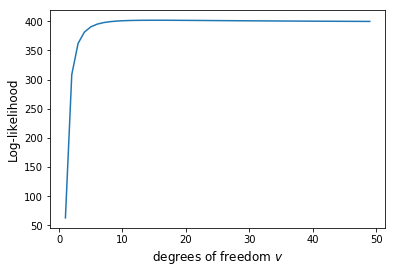

In [32]:
#list of small functions together used to calculate the contribution to copula density with input Ut(1x5) values as list for five reference names observes at time t.
#function to call t_c_density
#call t_copula density function to compute degree of freedom parameter (d.f.)
n=5  # # of dimensional
b_arr=df2.corr()  #correlation matrix

sum_copula_dens_list=[]
for i in range(1,50):
    sum_copula_dens=0
    for k in range(260):
        u_arr=df.loc[k:k].values.flatten()  # input Ut(1x5) values at time t, each row
        u_arr=u_arr.tolist()
        sum_copula_dens=sum_copula_dens+np.log(pys.t_c_density(i,u_arr,b_arr,n))
    sum_copula_dens_list.append(sum_copula_dens)
x=range(1,50)
y=sum_copula_dens_list
plt.plot(x,y);

plt.xlabel("degrees of freedom $v$", fontsize=12)
plt.ylabel("Log-likelihood", fontsize=12)



In [33]:
#T Copula
# Chi-squared random variable computation
nu=10
Chi_square_RV=pd.DataFrame(np.sqrt(np.random.chisquare(nu,100000)/nu),columns=list('1'))
#Chi_square_RV.head()

In [34]:
#EQT_RV = pd.DataFrame(npr.standard_normal(500000).reshape(100000,5), columns=list('12345'))  #if using python std. normal variables
#EQT_RV_input=pd.read_csv('C:/Users/ashemi/Desktop/quants/CQF JAN 2018/FINAL PROJECT/Halton_seq.csv') #local computer drive
#EQT_RV_input=pd.read_csv('C:/Users/ashemi/Desktop/quants/CQF JAN 2018/FINAL PROJECT/Sobol_seq.csv') #local computer drive
#EQT_RV_input=pd.read_csv('/home/pojotorshemi/Halton_seq.csv') #google cloud platform storage Halton_sequence
#EQT_RV_input=pd.read_csv('/home/pojotorshemi/Sobol_seq.csv') #google cloud platform storage Sobol_sequence

In [35]:
#Gaussian Copula
#5-dimensional vector of independent standard normal variables (If using Halton or Sobol Sequence)
#EQT_RV_H=norm.ppf(EQT_RV_input)
#EQT_RV = pd.DataFrame(EQT_RV_H, columns=list('12345'))

In [36]:
#Gaussian Copula
#5-dimensional vector of independent standard normal variables (If using python std. normal variables )
EQT_RV = pd.DataFrame(npr.standard_normal(500000).reshape(100000,5), columns=list('12345'))  #if using python std. normal variables

In [37]:
#T Copula
#5-dimensional vector of independent standard normal variables
T_EQT_RV=[]
for k in range(5):
    for i in range(len(EQT_RV)):
        T_EQT_RV.append(EQT_RV.iloc[i][k]/Chi_square_RV.iloc[i])
T_EQT_RV=np.asarray(T_EQT_RV)
T_EQT_RV=DataFrame(np.reshape(np.ravel(T_EQT_RV),(100000,5),order='F'),columns=list('12345'))

In [38]:
#5-dimensional vector of independent standard normal variables
EQT_RV.head(),T_EQT_RV.head()

(          1         2         3         4         5
 0 -0.115795  1.068911  1.075493  0.251122  0.080847
 1 -0.344893 -0.042331  1.023284 -0.497620 -0.850414
 2 -2.645394 -2.809039 -0.200135  0.291190  1.657702
 3  1.241516  1.263534 -0.413395 -0.607666  1.065466
 4  0.562154 -1.262797 -0.402907  0.016190  1.474836,
           1         2         3         4         5
 0 -0.126929  1.171688  1.178903  0.275267  0.088620
 1 -0.397516 -0.048789  1.179415 -0.573547 -0.980168
 2 -2.470534 -2.623362 -0.186907  0.271942  1.548128
 3  1.387134  1.411735 -0.461882 -0.678939  1.190435
 4  0.525195 -1.179772 -0.376417  0.015125  1.377870)

In [39]:
#Python DataFrame.5-dimensional vector of independent standard normal variables
G_corr= DataFrame(G_corr,columns=list('12345'))
#G_corr
T_G_corr= DataFrame(T_G_corr,columns=list('12345'))
#T_G_corr

In [40]:
#Adjustment of "correlation matrix" before imposing correlation.i.e 5X5 to 4X5
#Gaussian Copula. 
G_corr_new = G_corr.iloc[1:]

#T Copula.
T_G_corr_new=T_G_corr.iloc[1:]

#G_corr_new, T_G_corr_new

In [41]:
#Gaussian Copula. Impose correlation (100000 X 5 * 5 X 4)
EQT_Corr_RV=np.matmul(EQT_RV,np.transpose(G_corr_new))

#T Copula. Impose correlation (10000 X 5 * 5 X 4)
T_EQT_Corr_RV=np.matmul(T_EQT_RV,np.transpose(T_G_corr_new))

In [42]:
#Python DataFrame containing correlated random variables

#Gaussian Copula. 
EQT_Corr_RV = pd.DataFrame(EQT_Corr_RV, columns=list('2345'))

#T Copula.
T_EQT_Corr_RV = pd.DataFrame(T_EQT_Corr_RV, columns=list('2345'))

EQT_Corr_RV.head(),T_EQT_Corr_RV.head()

(          2         3         4         5
 0  0.627490  0.964957  0.545388  0.756481
 1 -0.285018  0.619601 -0.428966 -0.184179
 2 -3.844899 -2.111350 -2.397432 -1.112980
 3  1.767882  0.574027  0.720663  1.344875
 4 -0.424653 -0.197926 -0.023194  0.761872,
           2         3         4         5
 0  0.693892  1.082930  0.638643  0.869243
 1 -0.327043  0.742075 -0.465404 -0.151076
 2 -3.592609 -1.923999 -2.278781 -0.955201
 3  1.975991  0.605376  0.819462  1.422303
 4 -0.404536 -0.206903 -0.050214  0.684418)

In [43]:
#Insert the first column back into the vector of correlated random variables
#Gaussian Copula. 
EQT_Corr_RV.insert(0,'1',EQT_RV['1'])

#T Copula.
T_EQT_Corr_RV.insert(0,'1',T_EQT_RV['1'])

EQT_Corr_RV.head(),T_EQT_Corr_RV.head()

(          1         2         3         4         5
 0 -0.115795  0.627490  0.964957  0.545388  0.756481
 1 -0.344893 -0.285018  0.619601 -0.428966 -0.184179
 2 -2.645394 -3.844899 -2.111350 -2.397432 -1.112980
 3  1.241516  1.767882  0.574027  0.720663  1.344875
 4  0.562154 -0.424653 -0.197926 -0.023194  0.761872,
           1         2         3         4         5
 0 -0.126929  0.693892  1.082930  0.638643  0.869243
 1 -0.397516 -0.327043  0.742075 -0.465404 -0.151076
 2 -2.470534 -3.592609 -1.923999 -2.278781 -0.955201
 3  1.387134  1.975991  0.605376  0.819462  1.422303
 4  0.525195 -0.404536 -0.206903 -0.050214  0.684418)

In [44]:
#Python DataFrame containing correlated uniform vector

#Gaussian Copula. Use Normal CDF to map to a correlated uniform vector
EQT_Corr_SNRV=DataFrame(norm.cdf(EQT_Corr_RV),columns=list('12345'))

#T Copula. Use t CDF to map to a correlated uniform vector #right side t
T_EQT_Corr_SNRV=DataFrame((1-stats.t.cdf(T_EQT_Corr_RV,nu)),columns=list('12345'))

In [45]:
EQT_Corr_SNRV.head(),T_EQT_Corr_SNRV.head()

(          1         2         3         4         5
 0  0.453908  0.734831  0.832717  0.707257  0.775320
 1  0.365087  0.387815  0.732240  0.333974  0.426937
 2  0.004080  0.000060  0.017371  0.008255  0.132858
 3  0.892792  0.961460  0.717025  0.764441  0.910667
 4  0.712995  0.335545  0.421552  0.490748  0.776932,
           1         2         3         4         5
 0  0.549244  0.251775  0.152130  0.268703  0.202547
 1  0.650330  0.624811  0.237555  0.674194  0.558540
 2  0.983463  0.997546  0.958372  0.977060  0.819002
 3  0.097769  0.038190  0.279208  0.215810  0.092686
 4  0.305447  0.652832  0.579881  0.519530  0.254631)

In [46]:
#absolute values of \log(1-u)\ to be compared to cumulative hazard rates
Pre_def_time=DataFrame(abs(np.log(1-EQT_Corr_SNRV)),columns=list('12345'))
T_cop_Pre_def_time=DataFrame(abs(np.log(1-T_EQT_Corr_SNRV)),columns=list('12345'))

In [47]:
Pre_def_time.head(),T_cop_Pre_def_time.head()

(          1         2         3         4         5
 0  0.604967  1.327387  1.788067  1.228459  1.493076
 1  0.454268  0.490721  1.317663  0.406427  0.556759
 2  0.004088  0.000060  0.017524  0.008289  0.142553
 3  2.232989  3.256050  1.262397  1.445796  2.415387
 4  1.248254  0.408788  0.547406  0.674812  1.500278,
           1         2         3         4         5
 0  0.796828  0.290051  0.165028  0.312936  0.226333
 1  1.050766  0.980325  0.271225  1.121453  0.817668
 2  4.102137  6.010080  3.178974  3.774858  1.709267
 3  0.102885  0.038938  0.327405  0.243104  0.097267
 4  0.364487  1.057947  0.867218  0.732990  0.293876)

In [48]:
#Exalt default times computation.#Code "workhorse"
#Gaussian Copula.
A1=pys.exalt_default_times(5,Pre_def_time,df3,df4,df5,EQT_Corr_SNRV)

In [49]:
#Exalt default times computation.#Code "workhorse"
#T Copula
T_A1=pys.exalt_default_times(5,T_cop_Pre_def_time,df3,df4,df5,T_EQT_Corr_SNRV)

In [50]:
A1= np.reshape(A1, (5,100000)).T
T_A1= np.reshape(T_A1, (5,100000)).T

In [51]:
PL1=DataFrame(A1,columns=list('12345'))
T_PL1=DataFrame(T_A1,columns=list('12345'))

In [52]:
PL2 = PL1.copy(deep=True) #create dummy duplicate dataframe like df_1
T_PL2 =T_PL1.copy(deep=True)

PL2[:] = 1000 #set dummpy dataframe to 1000
T_PL2[:] = 1000 

PL3=PL1.where(PL1 != 0, PL2) # where PL1 is zero(0) replace with a 1000
T_PL3=T_PL1.where(T_PL1 != 0, T_PL2)

PL3 =PL3.apply(np.sort,axis=1) #then sort PL3 column-wise
T_PL3 =T_PL3.apply(np.sort,axis=1)

PL3=PL3.tolist()  #get a list from numpy array?
T_PL3=T_PL3.tolist()
PL3=DataFrame(PL3,columns=list('12345'))
T_PL3=DataFrame(T_PL3,columns=list('12345'))

PL3[PL3 == 1000] = 0 #replace 1000 entries with zero(0) entries
T_PL3[T_PL3 == 1000] = 0 

In [53]:
#discount factor
Df_1 =[]
T=5
for i in range(T+1):
    Df_1.append(np.exp(-i*0.02))
Df=Df_1*np.ones((T+1))
DfT=np.transpose(Df)

In [54]:
DfT=DataFrame(DfT,columns=list('1')) # column of discount factor
#DfT

In [55]:
PL3.head(20) ,T_PL3.head(20)

(           1         2         3         4    5
 0   0.000000  0.000000  0.000000  0.000000  0.0
 1   0.000000  0.000000  0.000000  0.000000  0.0
 2   0.003799  0.572479  0.942571  3.101088  0.0
 3   0.000000  0.000000  0.000000  0.000000  0.0
 4   0.000000  0.000000  0.000000  0.000000  0.0
 5   0.000000  0.000000  0.000000  0.000000  0.0
 6   0.000000  0.000000  0.000000  0.000000  0.0
 7   2.803015  0.000000  0.000000  0.000000  0.0
 8   0.000000  0.000000  0.000000  0.000000  0.0
 9   0.000000  0.000000  0.000000  0.000000  0.0
 10  1.939822  0.000000  0.000000  0.000000  0.0
 11  0.000000  0.000000  0.000000  0.000000  0.0
 12  1.544400  0.000000  0.000000  0.000000  0.0
 13  1.045829  3.554886  0.000000  0.000000  0.0
 14  0.000000  0.000000  0.000000  0.000000  0.0
 15  0.000000  0.000000  0.000000  0.000000  0.0
 16  0.000000  0.000000  0.000000  0.000000  0.0
 17  0.000000  0.000000  0.000000  0.000000  0.0
 18  0.000000  0.000000  0.000000  0.000000  0.0
 19  0.000000  0.000

In [56]:
#SAMPLING FROM GaussianCOPULA

In [58]:
#Premium leg computation
r=0.02
PL4=pys.prem_leg(PL3,r,DfT)

In [59]:
#Default leg (DLG) computation
DLG = PL3.copy(deep=True)
RR=0.4
r=0.02
for i in range(len(PL3)):
    #for j in range(5):
            
        if PL3.iloc[i][0]== 0:
            DLG.iloc[i][0]=0
        else:
            DLG.iloc[i][0]=(PL3.iloc[i][0]/PL3.iloc[i][0])*(1-RR)*(np.exp(-math.ceil(PL3.iloc[i][0])*r)*1/5)
            
        if PL3.iloc[i][1]== 0:
            DLG.iloc[i][1]=0
        else:
            DLG.iloc[i][1]=(PL3.iloc[i][1]/PL3.iloc[i][1])*(1-RR)*(np.exp(-math.ceil(PL3.iloc[i][1])*r)*1/5)
            
        if PL3.iloc[i][2]== 0:
            DLG.iloc[i][2]=0
        else:
            DLG.iloc[i][2]=(PL3.iloc[i][2]/PL3.iloc[i][2])*(1-RR)*(np.exp(-math.ceil(PL3.iloc[i][2])*r)*1/5)
            
        if PL3.iloc[i][3]== 0:
            DLG.iloc[i][3]=0
        else:
            DLG.iloc[i][3]=(PL3.iloc[i][3]/PL3.iloc[i][3])*(1-RR)*(np.exp(-math.ceil(PL3.iloc[i][3])*r)*1/5)
            
        if PL3.iloc[i][4]== 0:
            DLG.iloc[i][4]=0
        else:
            DLG.iloc[i][4]=(PL3.iloc[i][4]/PL3.iloc[i][4])*(1-RR)*(np.exp(-math.ceil(PL3.iloc[i][4])*r)*1/5)

In [60]:
#DLG.cumsum()

In [61]:
#PL4.cumsum()

In [62]:
G_nth_def=[]
Ist_def=DLG['1'].mean()/PL4['1'].mean()
G_nth_def.append(Ist_def)

In [63]:
Second_def=DLG['2'].mean()/PL4['2'].mean()
G_nth_def.append(Second_def)

In [64]:
Third_def=DLG['3'].mean()/PL4['4'].mean()
G_nth_def.append(Third_def)

In [65]:
Fourth_def=DLG['4'].mean()/PL4['4'].mean()
G_nth_def.append(Fourth_def)

In [66]:
Fifth_def=DLG['5'].mean()/PL4['5'].mean()
G_nth_def.append(Fifth_def)

In [67]:
type(G_nth_def)

list

In [68]:
#SAMPLING FROM T-COPULA

In [69]:
#T_Copula_Premium leg computation
T_PL4=pys.prem_leg(T_PL3,r,DfT)

In [70]:
#Default leg (DLG) compuation
T_DLG = T_PL3.copy(deep=True)
#RR=0.4
for i in range(len(T_PL3)):
    #for j in range(5):
            
        if T_PL3.iloc[i][0]== 0:
            T_DLG.iloc[i][0]=0
        else:
            T_DLG.iloc[i][0]=(T_PL3.iloc[i][0]/T_PL3.iloc[i][0])*(1-RR)*(np.exp(-math.ceil(T_PL3.iloc[i][0])*r)*1/5)
            
        if T_PL3.iloc[i][1]== 0:
            T_DLG.iloc[i][1]=0
        else:
            T_DLG.iloc[i][1]=(T_PL3.iloc[i][1]/T_PL3.iloc[i][1])*(1-RR)*(np.exp(-math.ceil(T_PL3.iloc[i][1])*r)*1/5)
            
        if T_PL3.iloc[i][2]== 0:
            T_DLG.iloc[i][2]=0
        else:
            T_DLG.iloc[i][2]=(T_PL3.iloc[i][2]/T_PL3.iloc[i][2])*(1-RR)*(np.exp(-math.ceil(T_PL3.iloc[i][2])*r)*1/5)
            
        if T_PL3.iloc[i][3]== 0:
            T_DLG.iloc[i][3]=0
        else:
            T_DLG.iloc[i][3]=(T_PL3.iloc[i][3]/T_PL3.iloc[i][3])*(1-RR)*(np.exp(-math.ceil(T_PL3.iloc[i][3])*r)*1/5)
            
        if T_PL3.iloc[i][4]== 0:
            T_DLG.iloc[i][4]=0
        else:
            T_DLG.iloc[i][4]=(T_PL3.iloc[i][4]/T_PL3.iloc[i][4])*(1-RR)*(np.exp(-math.ceil(T_PL3.iloc[i][4])*r)*1/5)

In [71]:
T_nth_def=[]
T_Ist_def=T_DLG['1'].mean()/T_PL4['1'].mean()
T_nth_def.append(T_Ist_def)

In [72]:
T_Second_def=T_DLG['2'].mean()/T_PL4['2'].mean()
T_nth_def.append(T_Second_def)

In [73]:
T_Third_def=T_DLG['3'].mean()/T_PL4['4'].mean()
T_nth_def.append(T_Third_def)

In [74]:
T_Fourth_def=T_DLG['4'].mean()/T_PL4['4'].mean()
T_nth_def.append(T_Fourth_def)

In [75]:
T_Fifth_def=T_DLG['5'].mean()/T_PL4['5'].mean()
T_nth_def.append(T_Fifth_def)

In [76]:
#nth_def = {'G_nth_def': T_nth_def, 'T_nth_def': T_nth_def}

In [77]:
nth_def = pd.DataFrame({'G_nth_def': G_nth_def, 'T_nth_def': T_nth_def})

In [78]:
nth_def.index = range(1,6)
nth_def

,G_nth_def,T_nth_def
1,0.005532,0.005325
2,0.002310,0.002352
3,0.001029,0.001084
4,0.000392,0.000429
5,0.000131,0.000157


In [79]:
#cumulative premium leg and default leg. #"cumulative" spread computation #Gaussian Copula
DLG_cumsum=DLG.cumsum()
PL4_cumsum=PL4.cumsum()
G_spread_avg_1=DLG_cumsum['1']/PL4_cumsum['1']
G_spread_avg_2=DLG_cumsum['2']/PL4_cumsum['2']
G_spread_avg_3=DLG_cumsum['3']/PL4_cumsum['3']
G_spread_avg_4=DLG_cumsum['4']/PL4_cumsum['4']
G_spread_avg_5=DLG_cumsum['5']/PL4_cumsum['5']

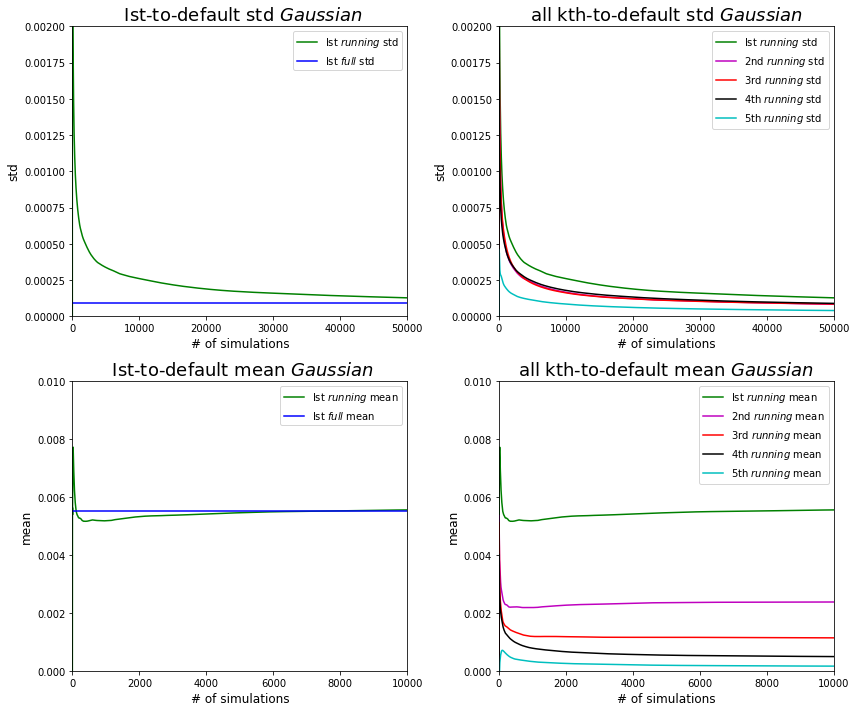

In [80]:
#Gaussian Copula
X= G_spread_avg_1.expanding(min_periods=1).std()[:50000]
Y= G_spread_avg_2.expanding(min_periods=1).std()[:50000]
W= G_spread_avg_3.expanding(min_periods=1).std()[:50000]
Z= G_spread_avg_4.expanding(min_periods=1).std()[:50000]
S= G_spread_avg_5.expanding(min_periods=1).std()[:50000]

#Figure 1. Top left
fig=plt.figure(figsize=(12,10))
sub1=fig.add_subplot(221)
plt.axis([0,len(X),0,0.002])
X.plot(ax=sub1,color='g',label='Ist $running$ std')
sub1.axhline(y=np.std(G_spread_avg_1),color='b',label='Ist $full$ std')
plt.title(" Ist-to-default std $Gaussian$", fontsize=18)
plt.xlabel("# of simulations", fontsize=12)
plt.ylabel("std", fontsize=12)
sub1.legend()

#Figure 2. Top right
sub1=fig.add_subplot(222)
plt.axis([0,len(Z),0,0.002])
X.plot(ax=sub1,color='g',label='Ist $running$ std')
Y.plot(ax=sub1,color='m',label='2nd $running$ std')
W.plot(ax=sub1,color='r',label='3rd $running$ std')
Z.plot(ax=sub1,color='k',label='4th $running$ std')
S.plot(ax=sub1,color='c',label='5th $running$ std')
plt.title("all kth-to-default std $Gaussian$", fontsize=18)
plt.xlabel("# of simulations", fontsize=12)
plt.ylabel("std", fontsize=12)
sub1.legend()

X_mean= G_spread_avg_1.expanding(min_periods=1).mean()[:10000]
Y_mean= G_spread_avg_2.expanding(min_periods=1).mean()[:10000]
W_mean= G_spread_avg_3.expanding(min_periods=1).mean()[:10000]
Z_mean= G_spread_avg_4.expanding(min_periods=1).mean()[:10000]
S_mean= G_spread_avg_5.expanding(min_periods=1).mean()[:10000]

#Figure 3. Bottom left
sub1=fig.add_subplot(223)
plt.axis([0,len(X_mean),0,0.01])
X_mean.plot(ax=sub1,color='g',label='Ist $running$ mean')
sub1.axhline(y=np.mean(G_spread_avg_1),color='b',label='Ist $full$ mean')
plt.title(" Ist-to-default mean $Gaussian$", fontsize=18)
plt.xlabel("# of simulations", fontsize=12)
plt.ylabel("mean", fontsize=12)
sub1.legend()

#Figure 4. Bottom right
sub1=fig.add_subplot(224)
plt.axis([0,len(X_mean),0,0.01])
X_mean.plot(ax=sub1,color='g',label='Ist $running$ mean')
Y_mean.plot(ax=sub1,color='m',label='2nd $running$ mean')
W_mean.plot(ax=sub1,color='r',label='3rd $running$ mean')
Z_mean.plot(ax=sub1,color='k',label='4th $running$ mean')
S_mean.plot(ax=sub1,color='c',label='5th $running$ mean')
plt.title("all kth-to-default mean $Gaussian$", fontsize=18)
plt.xlabel("# of simulations", fontsize=12)
plt.ylabel("mean", fontsize=12)
sub1.legend()

plt.tight_layout()
fig=plt.gcf()

In [81]:
#cumulative premium leg and default leg. #"cumulative" spread computation #T Copula
T_DLG_cumsum=T_DLG.cumsum()
T_PL4_cumsum=T_PL4.cumsum()
T_spread_avg_1=T_DLG_cumsum['1']/T_PL4_cumsum['1']
T_spread_avg_2=T_DLG_cumsum['2']/T_PL4_cumsum['2']
T_spread_avg_3=T_DLG_cumsum['3']/T_PL4_cumsum['3']
T_spread_avg_4=T_DLG_cumsum['4']/T_PL4_cumsum['4']
T_spread_avg_5=T_DLG_cumsum['5']/T_PL4_cumsum['5']

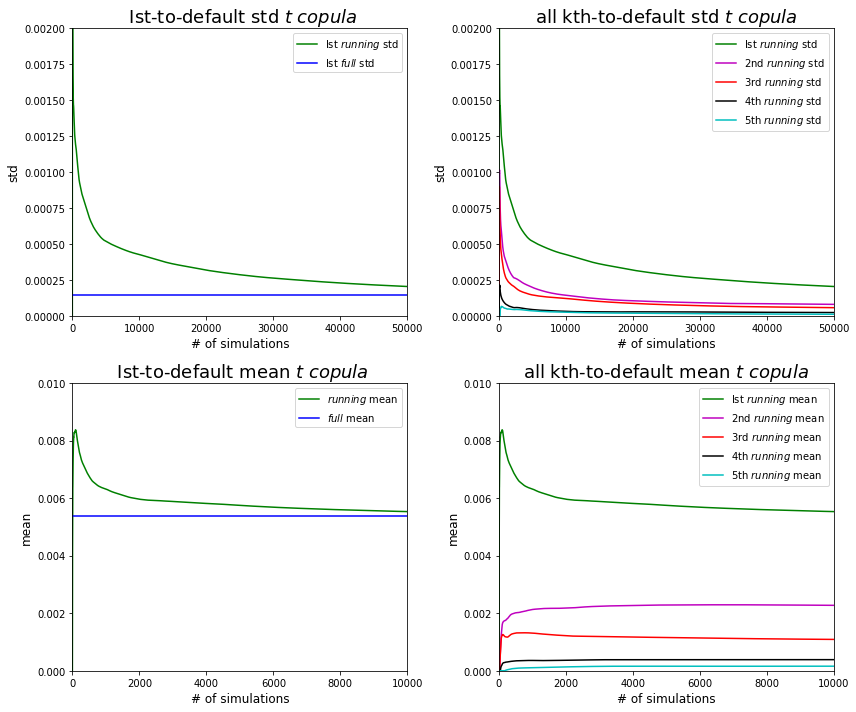

In [82]:
#T Copula
X1= T_spread_avg_1.expanding(min_periods=1).std()[:50000]
Y1= T_spread_avg_2.expanding(min_periods=1).std()[:50000]
W1= T_spread_avg_3.expanding(min_periods=1).std()[:50000]
Z1= T_spread_avg_4.expanding(min_periods=1).std()[:50000]
S1= T_spread_avg_5.expanding(min_periods=1).std()[:50000]

#Figure 1. Top left
fig=plt.figure(figsize=(12,10))
sub1=fig.add_subplot(221)
plt.axis([0,len(X1),0,0.002])
X1.plot(ax=sub1,color='g',label='Ist $running$ std')
sub1.axhline(y=np.std(T_spread_avg_1),color='b',label='Ist $full$ std')
plt.title(" Ist-to-default std $t$ $copula$", fontsize=18)
plt.xlabel("# of simulations", fontsize=12)
plt.ylabel("std", fontsize=12)
sub1.legend()

#Figure 2. Top right
sub1=fig.add_subplot(222)
plt.axis([0,len(Z),0,0.002])
X1.plot(ax=sub1,color='g',label='Ist $running$ std')
Y1.plot(ax=sub1,color='m',label='2nd $running$ std')
W1.plot(ax=sub1,color='r',label='3rd $running$ std')
Z1.plot(ax=sub1,color='k',label='4th $running$ std')
S1.plot(ax=sub1,color='c',label='5th $running$ std')
plt.title("all kth-to-default std $t$ $copula$", fontsize=18)
plt.xlabel("# of simulations", fontsize=12)
plt.ylabel("std", fontsize=12)
sub1.legend()

X1_mean= T_spread_avg_1.expanding(min_periods=1).mean()[:10000]
Y1_mean= T_spread_avg_2.expanding(min_periods=1).mean()[:10000]
W1_mean= T_spread_avg_3.expanding(min_periods=1).mean()[:10000]
Z1_mean= T_spread_avg_4.expanding(min_periods=1).mean()[:10000]
S1_mean= T_spread_avg_5.expanding(min_periods=1).mean()[:10000]


#Figure 3. Bottom left
sub1=fig.add_subplot(223)
plt.axis([0,len(X1_mean),0,0.01])
X1_mean.plot(ax=sub1,color='g',label='$running$ mean')
sub1.axhline(y=np.mean(T_spread_avg_1),color='b',label='$full$ mean')
plt.title(" Ist-to-default mean $t$ $copula$", fontsize=18)
plt.xlabel("# of simulations", fontsize=12)
plt.ylabel("mean", fontsize=12)
sub1.legend()

#Figure 4. Bottom right
sub1=fig.add_subplot(224)
plt.axis([0,len(X1_mean),0,0.01])
X1_mean.plot(ax=sub1,color='g',label='Ist $running$ mean')
Y1_mean.plot(ax=sub1,color='m',label='2nd $running$ mean')
W1_mean.plot(ax=sub1,color='r',label='3rd $running$ mean')
Z1_mean.plot(ax=sub1,color='k',label='4th $running$ mean')
S1_mean.plot(ax=sub1,color='c',label='5th $running$ mean')
plt.title("all kth-to-default mean $t$ $copula$", fontsize=18)
plt.xlabel("# of simulations", fontsize=12)
plt.ylabel("mean", fontsize=12)
sub1.legend()


plt.tight_layout()
fig=plt.gcf()
